In [ ]:
"""
CSCI3230 / ESTR3108 2021-22 First Term Assignment 3
I declare that the assignment here submitted is original except for source
material explicitly acknowledged, and that the same or closely related material
has not been previously submitted for another course. I also acknowledge that I
am aware of University policy and regulations on honesty in academic work, and
of the disciplinary guidelines and procedures applicable to breaches of such
policy and regulations, as contained in the following websites.
University Guideline on Academic Honesty:
http://www.cuhk.edu.hk/policy/academichonesty/
Faculty of Engineering Guidelines to Academic Honesty:
http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
Student Name: Lam Hiu Ching
Student ID : 1155129247
"""

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import pandas as pd
df1 = files.upload()
df2 = files.upload()

Saving train_q4(1).csv to train_q4(1).csv


Saving test_q4(1).csv to test_q4(1).csv


In [17]:
x1 = torch.tensor(pd.read_csv('train_q4(1).csv')['x1']).unsqueeze(1).float()
x2 = torch.tensor(pd.read_csv('train_q4(1).csv')['x2']).unsqueeze(1).float()
train_x = torch.cat((x1, x2), dim=1)
train_y = torch.tensor(pd.read_csv('train_q4(1).csv')['y'])

x1 = torch.tensor(pd.read_csv('train_q4(1).csv')['x1']).unsqueeze(1).float()
x2 = torch.tensor(pd.read_csv('train_q4(1).csv')['x2']).unsqueeze(1).float()
test_x = torch.cat((x1, x2), dim=1)
test_y = torch.tensor(pd.read_csv('test_q4(1).csv')['y'])


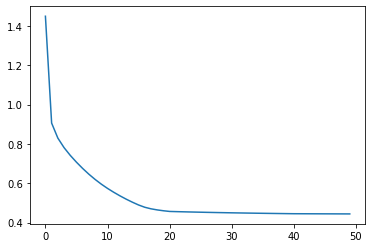

w1:  tensor([[ 1.0186, -0.2970,  0.9568],
        [-2.0640, -1.4301,  0.1272]], requires_grad=True)
w2:  tensor([[ 1.5305, -0.9179, -0.7177],
        [-0.0795,  1.0447,  1.0025],
        [-0.4609,  0.4832,  0.3152]], grad_fn=<TBackward0>)
Accuracy: 52.0 %


In [321]:
#Question Q4a(1)(2) (init_lr = 0.1)
w1 = torch.tensor(
          [[0.74, 0.1, 0.98],
          [-2.04, -1.4, -0.31]], device='cpu', requires_grad=True)
w2 = torch.tensor(torch.tensor(
                [[1.37, -0.9, -0.8],
                [-0.08, 0.94, 0.47],
                [-0.3, 0.57, 0.93]]).t().tolist(), device='cpu', requires_grad=True)
train_loss = []
init_lr = 0.1
for i in range(50):
  lr = init_lr * pow(0.3, i//20)
  y_pred = train_x.mm(w1).clamp(min=0).mm(w2)
  loss = torch.nn.functional.nll_loss(torch.nn.LogSoftmax(dim=1)(y_pred), train_y)
  train_loss.append(loss.item())
  loss.backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

  w1.grad.zero_()
  w2.grad.zero_()

plt.plot([_ for _ in range(50)], train_loss)
plt.show()
print("w1: ",w1)
print("w2: ",w2.t())

#Question Q4a(3)
y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
y_pred = torch.softmax(y_pred, dim=1).max(1)[1]

acc = 0
for i in range(len(test_y)):
  if (y_pred[i] == test_y[i]):
    acc += 1

print('Accuracy:',acc/len(test_y)*100.0, '%')

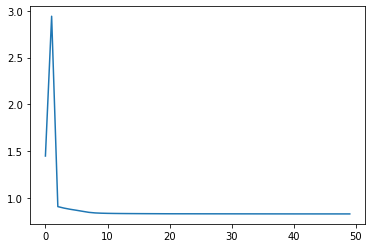

w1:  tensor([[ 0.2537, -0.4833, -0.3027],
        [-3.1115, -1.5151, -0.7082]], requires_grad=True)
w2:  tensor([[ 1.5082, -0.6465, -0.1343],
        [ 0.4220,  0.9842,  1.1584],
        [-0.9402,  0.2722, -0.4241]], grad_fn=<TBackward0>)
Accuracy: 45.75 %


In [25]:
#Question Q4b (init_lr = 1.0)
w1 = torch.tensor(
          [[0.74, 0.1, 0.98],
          [-2.04, -1.4, -0.31]], device='cpu', requires_grad=True)
w2 = torch.tensor(torch.tensor(
                [[1.37, -0.9, -0.8],
                [-0.08, 0.94, 0.47],
                [-0.3, 0.57, 0.93]]).t().tolist(), device='cpu', requires_grad=True)
train_loss = []
init_lr = 1.0
for i in range(50):
  lr = init_lr * pow(0.3, i//20)
  y_pred = train_x.mm(w1).clamp(min=0).mm(w2)
  loss = torch.nn.functional.nll_loss(torch.nn.LogSoftmax(dim=1)(y_pred), train_y)
  train_loss.append(loss.item())
  loss.backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

  w1.grad.zero_()
  w2.grad.zero_()

plt.plot([_ for _ in range(50)], train_loss)
plt.show()
print("w1: ",w1)
print("w2: ",w2.t())

y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
y_pred = torch.softmax(y_pred, dim=1).max(1)[1]

acc = 0
for i in range(len(test_y)):
  if (y_pred[i] == test_y[i]):
    acc += 1

print('Accuracy:',acc/len(test_y)*100.0, '%')

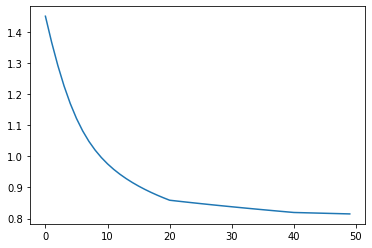

w1:  tensor([[ 0.8627, -0.0390,  0.8312],
        [-2.0662, -1.3738, -0.3055]], requires_grad=True)
w2:  tensor([[ 1.4603, -0.8739, -0.7407],
        [-0.1039,  0.9317,  0.6105],
        [-0.3664,  0.5522,  0.7302]], grad_fn=<TBackward0>)
Accuracy: 30.45 %


In [328]:
#Question Q4b (init_lr = 0.01)
w1 = torch.tensor(
          [[0.74, 0.1, 0.98],
          [-2.04, -1.4, -0.31]], device='cpu', requires_grad=True)
w2 = torch.tensor(torch.tensor(
                [[1.37, -0.9, -0.8],
                [-0.08, 0.94, 0.47],
                [-0.3, 0.57, 0.93]]).t().tolist(), device='cpu', requires_grad=True)
train_loss = []
init_lr = 0.01
for i in range(50):
  lr = init_lr * pow(0.3, i//20)
  y_pred = train_x.mm(w1).clamp(min=0).mm(w2)
  loss = torch.nn.functional.nll_loss(torch.nn.LogSoftmax(dim=1)(y_pred), train_y)
  train_loss.append(loss.item())
  loss.backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

  w1.grad.zero_()
  w2.grad.zero_()

plt.plot([_ for _ in range(50)], train_loss)
plt.show()
print("w1: ",w1)
print("w2: ",w2.t())

y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
y_pred = torch.softmax(y_pred, dim=1).max(1)[1]

acc = 0
for i in range(len(test_y)):
  if (y_pred[i] == test_y[i]):
    acc += 1

print('Accuracy:',acc/len(test_y)*100.0, '%')

Initial w1:
 tensor([[0.9389, 0.3814, 0.3763],
        [0.8003, 0.2979, 0.5237]], requires_grad=True)
Initial w2:
 tensor([[0.4809, 0.8216, 0.9365],
        [0.8042, 0.2633, 0.0412],
        [0.2887, 0.2945, 0.3682]], grad_fn=<TBackward0>)
Initial learning rate: 0.493600567836609


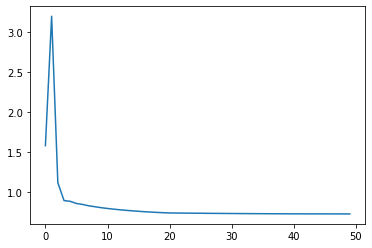

w1:  tensor([[ 0.3770, -0.3620, -0.4334],
        [ 0.3710, -0.3702, -0.4390]], requires_grad=True)
w2:  tensor([[ 0.6808,  0.3946,  0.3368],
        [ 1.2103,  0.9073,  0.9367],
        [-0.3172,  0.0775,  0.0725]], grad_fn=<TBackward0>)
Accuracy: 55.900000000000006 %


In [319]:
#Question Q4c
import random
w1 = torch.rand(2, 3, device='cpu', requires_grad=True)
w2 = torch.tensor(torch.rand(3, 3).t().tolist(), device='cpu', requires_grad=True)
print("Initial w1:\n",w1)
print("Initial w2:\n",w2.t())

train_loss = []
init_lr = random.random()
print("Initial learning rate:",init_lr)
for i in range(50):
  lr = init_lr * pow(0.3, i//20)
  y_pred = train_x.mm(w1).clamp(min=0).mm(w2)
  loss = torch.nn.functional.nll_loss(torch.nn.LogSoftmax(dim=1)(y_pred), train_y)
  train_loss.append(loss.item())
  loss.backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

  w1.grad.zero_()
  w2.grad.zero_()

plt.plot([_ for _ in range(50)], train_loss)
plt.show()
print("w1: ",w1)
print("w2: ",w2.t())

y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
y_pred = torch.softmax(y_pred, dim=1).max(1)[1]

acc = 0
for i in range(len(test_y)):
  if (y_pred[i] == test_y[i]):
    acc += 1

print('Accuracy:',acc/len(test_y)*100.0, '%')